In [ ]:
%env PYTHONHASHSEED=0

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

In [ ]:
SEED = 42

DEV_SPLIT=0.1

IMAGE_SIZE = (28, 28)
CLASSES = 10

In [ ]:
import random as python_random

# Fix random seed for reproducibility.
np.random.seed(SEED)
python_random.seed(SEED)
tf.random.set_seed(SEED)

In [5]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [6]:
Y_train = train_data.iloc[:,0].values.astype("int32")
X_train = train_data.iloc[:,1:].values.astype("float32")

X_test = test_data.values.astype("float32")

In [7]:
# All images are 28x28 pixels
X_train = X_train.reshape(-1, *IMAGE_SIZE, 1)
print(X_train.shape)
X_test = X_test.reshape(-1, *IMAGE_SIZE, 1)
print(X_test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


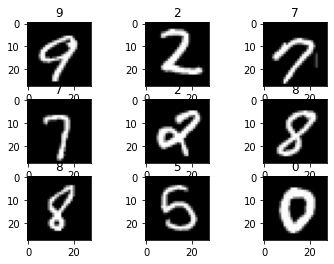

In [8]:
for i in range(9):
    idx = 100 + i
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[idx].reshape(IMAGE_SIZE), cmap=plt.get_cmap('gray'))
    plt.title(Y_train[idx])

In [9]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=CLASSES)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, Y_train, test_size=DEV_SPLIT, random_state=SEED)

print(X_train.shape, Y_train.shape)
print(X_dev.shape, Y_dev.shape)

(37800, 28, 28, 1) (37800, 10)
(4200, 28, 28, 1) (4200, 10)


In [11]:
def simple_cnn(input_shape, classes_n):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization
    
    model = Sequential([
        Conv2D(filters=64, kernel_size=5, input_shape=input_shape, activation="relu"),
        MaxPool2D(pool_size=2),
        BatchNormalization(),
        
        Conv2D(filters=128, kernel_size=3, activation="relu"),
        MaxPool2D(pool_size=2),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(1024, activation="relu"),
        BatchNormalization(),
        
        Dense(classes_n, activation="softmax")
    ])
    
    model.compile(optimizer="adam", metrics=["accuracy"], loss="categorical_crossentropy")
    
    model.optimizer.lr = 0.01
    
    return model

In [12]:
model = simple_cnn((*IMAGE_SIZE, 1), CLASSES)

In [13]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_dev, Y_dev))

Epoch 1/20
591/591 [==============================] - 51s 86ms/step - loss: 0.1992 - accuracy: 0.9546 - val_loss: 0.1128 - val_accuracy: 0.9762
Epoch 2/20
591/591 [==============================] - 46s 78ms/step - loss: 0.0640 - accuracy: 0.9833 - val_loss: 0.1035 - val_accuracy: 0.9757
Epoch 3/20
591/591 [==============================] - 45s 77ms/step - loss: 0.0483 - accuracy: 0.9866 - val_loss: 0.1018 - val_accuracy: 0.9729
Epoch 4/20
591/591 [==============================] - 47s 79ms/step - loss: 0.0431 - accuracy: 0.9871 - val_loss: 0.1976 - val_accuracy: 0.9795
Epoch 5/20
591/591 [==============================] - 45s 76ms/step - loss: 0.0515 - accuracy: 0.9863 - val_loss: 0.1123 - val_accuracy: 0.9774
Epoch 6/20
591/591 [==============================] - 46s 78ms/step - loss: 0.0487 - accuracy: 0.9871 - val_loss: 0.0725 - val_accuracy: 0.9864
Epoch 7/20
591/591 [==============================] - 48s 81ms/step - loss: 0.0354 - accuracy: 0.9906 - val_loss: 0.0761 - val_accuracy:

In [14]:
def plot_model_history(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


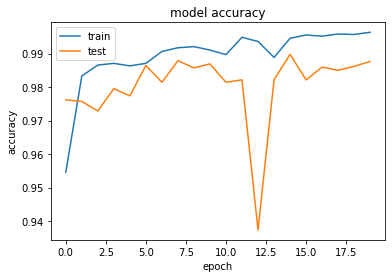

In [15]:
plot_model_history(history)

In [16]:
def submit_model(model, submission_name):
    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis=1)
    
    print(predictions[:10], "...")
    
    result = pd.DataFrame({"ImageId": np.arange(1, len(predictions) + 1, 1), "Label": predictions})
    result.to_csv(f"/kaggle/working/digit-recognizer/{submission_name}.csv", index=False)

In [18]:
submit_model(model, "dl_submission")

[2 0 9 9 3 7 0 3 0 3] ...
